# Notas del curso

**Tema:** _Grafos_  
**Subtema:** Exploración por expansión  
**Autor:** Dr. Óscar Arana Hernández  
**Semestre:** 2026-1

## Búsqueda por Expansión (BFS)

La **Búsqueda por Expansión** o **Breadth-First Search (BFS)** recorre un grafo **nivel por nivel**:

- Comienza en un nodo inicial.
- Visita todos sus vecinos antes de avanzar a los vecinos de esos vecinos.
- Utiliza una **fila (FIFO)** para almacenar los nodos pendientes.

**Características principales:**
- Recorre todo el grafo si es conexo.
- Encuentra caminos más cortos en grafos no ponderados.
- Complejidad: \(O(n + m)\), donde \(n\) es el número de nodos y \(m\) el número de aristas.

**Ejemplo de orden de visita (desde A):**


In [3]:
from collections import deque #fila FIFO

In [1]:
def bfs(G, s):
    visitados = set([s])
    orden = []
    fila = deque([s])   # usamos una fila (FIFO)

    while fila:
        u = fila.popleft()   # sacamos el primer elemento de la fila
        orden.append(u)
        for v in G[u]:
            if v not in visitados:
                visitados.add(v)
                fila.append(v)   # agregamos al final de la fila
    return orden

In [4]:
# Grafo de ejemplo
G = {
    "A": ["B", "C"],
    "B": ["A", "D", "E"],
    "C": ["A", "F"],
    "D": ["B"],
    "E": ["B"],
    "F": ["C"]
}

print("Recorrido BFS desde A:", bfs(G, "A"))

Recorrido BFS desde A: ['A', 'B', 'C', 'D', 'E', 'F']


## BFS con colores (blanco, gris, negro)

En el algoritmo BFS se utiliza una técnica de **coloreo** para visualizar el progreso de la búsqueda:

- **Blanco:** el vértice no ha sido descubierto todavía.  
- **Gris:** el vértice ya fue descubierto, pero aún tiene vecinos sin explorar.  
- **Negro:** el vértice y todos sus vecinos ya han sido completamente procesados.  

Esta convención permite distinguir entre:
- Los vértices que aún no han sido visitados.  
- Los que forman parte de la **frontera** (grises).  
- Los que ya quedaron terminados (negros).  

Durante la ejecución de BFS:
1. Todos los vértices inician en **blanco**.  
2. Cuando un vértice es descubierto, cambia a **gris**.  
3. Una vez que se procesan todos sus vecinos, pasa a **negro**.  

A continuación, se presenta un ejemplo en Python que muestra estos cambios de color paso a paso.


In [5]:
def bfs_colores(G, s):
    # Inicialización: todos en blanco
    color = {u: "blanco" for u in G}
    padre = {u: None for u in G}
    distancia = {u: float("inf") for u in G}

    color[s] = "gris"       # descubrimos el nodo fuente
    distancia[s] = 0

    fila = deque([s])
    paso = 0

    while fila:
        u = fila.popleft()
        print(f"Paso {paso}: visitando {u}, estados -> {color}")
        paso += 1

        # Recorremos los vecinos
        for v in G[u]:
            if color[v] == "blanco":      # aún no descubierto
                color[v] = "gris"
                padre[v] = u
                distancia[v] = distancia[u] + 1
                fila.append(v)

        color[u] = "negro"   # nodo terminado

    print("\nResultado final:")
    print("Colores:", color)
    print("Padres:", padre)
    print("Distancias:", distancia)

In [6]:
# Grafo de ejemplo
G = {
    "A": ["B", "C"],
    "B": ["A", "D", "E"],
    "C": ["A", "F"],
    "D": ["B"],
    "E": ["B"],
    "F": ["C"]
}

bfs_colores(G, "A")

Paso 0: visitando A, estados -> {'A': 'gris', 'B': 'blanco', 'C': 'blanco', 'D': 'blanco', 'E': 'blanco', 'F': 'blanco'}
Paso 1: visitando B, estados -> {'A': 'negro', 'B': 'gris', 'C': 'gris', 'D': 'blanco', 'E': 'blanco', 'F': 'blanco'}
Paso 2: visitando C, estados -> {'A': 'negro', 'B': 'negro', 'C': 'gris', 'D': 'gris', 'E': 'gris', 'F': 'blanco'}
Paso 3: visitando D, estados -> {'A': 'negro', 'B': 'negro', 'C': 'negro', 'D': 'gris', 'E': 'gris', 'F': 'gris'}
Paso 4: visitando E, estados -> {'A': 'negro', 'B': 'negro', 'C': 'negro', 'D': 'negro', 'E': 'gris', 'F': 'gris'}
Paso 5: visitando F, estados -> {'A': 'negro', 'B': 'negro', 'C': 'negro', 'D': 'negro', 'E': 'negro', 'F': 'gris'}

Resultado final:
Colores: {'A': 'negro', 'B': 'negro', 'C': 'negro', 'D': 'negro', 'E': 'negro', 'F': 'negro'}
Padres: {'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'C'}
Distancias: {'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 2}


## Visualizar un paso específico de BFS

Mostramos el estado del algoritmo BFS **en un paso k** (0, 1, 2, …), con colores:
- **blanco**: no descubierto
- **gris**: descubierto (frontera)
- **negro**: terminado

Cómo usar:
1. Ajusta `step = k` al paso que quieras visualizar.
2. Ejecuta el bloque: se dibuja **una sola figura** correspondiente a ese paso.
3. Si `k` está fuera de rango, se recorta al máximo disponible.

La fila (**FIFO**) actual y el **nodo en proceso** se muestran en el título de la figura.


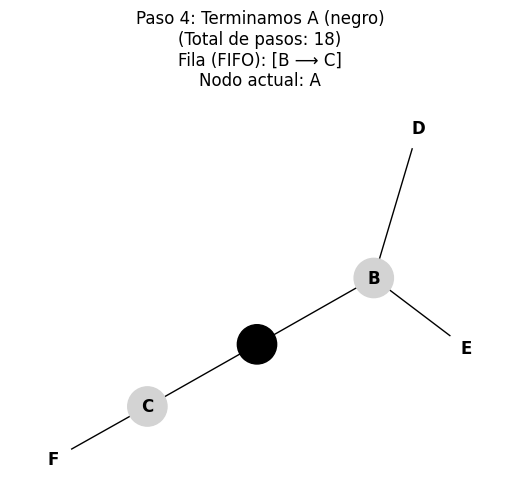

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# ---------- Generador de estados BFS (colores + fila + mensaje) ----------
def bfs_steps(G, s):
    colores = {u: "blanco" for u in G.nodes()}
    padre   = {u: None for u in G.nodes()}
    dist    = {u: float("inf") for u in G.nodes()}

    colores[s] = "gris"
    dist[s] = 0
    fila = deque([s])

    # Estado inicial
    yield colores.copy(), list(fila), None, "Inicio: descubrimos la fuente (gris) y la enfilamos"

    while fila:
        u = fila.popleft()
        # Antes de explorar vecinos de u
        yield colores.copy(), list(fila), u, f"Extraemos {u} de la fila"

        for v in G.neighbors(u):
            if colores[v] == "blanco":
                colores[v] = "gris"
                padre[v] = u
                dist[v] = dist[u] + 1
                fila.append(v)
                # Tras descubrir v
                yield colores.copy(), list(fila), u, f"Descubrimos {v} (gris) y lo enfilamos"

        # Terminamos u
        colores[u] = "negro"
        yield colores.copy(), list(fila), u, f"Terminamos {u} (negro)"

    # Fin
    yield colores.copy(), list(fila), None, "Fin: fila vacía"

# ---------- Utilidad para dibujar UN solo estado ----------
def _mpl_color_map(G, colores_dict):
    m = {"blanco":"white", "gris":"lightgray", "negro":"black"}
    return [m[colores_dict[u]] for u in G.nodes()]

def draw_bfs_single_state(G, pos, colores, fila, actual, titulo=""):
    plt.figure(figsize=(5,4))
    nx.draw(
        G, pos,
        with_labels=True,
        node_color=_mpl_color_map(G, colores),
        node_size=800,
        font_weight="bold"
    )
    fila_txt = " ⟶ ".join(fila) if fila else "vacía"
    info = f"{titulo}\nFila (FIFO): [{fila_txt}]"
    if actual is not None:
        info += f"\nNodo actual: {actual}"
    plt.gca().set_title(info)
    plt.axis("off")
    plt.show()

# ---------- EJEMPLO: construir grafo y mostrar paso k ----------
# Grafo de ejemplo
G = nx.Graph()
G.add_edges_from([
    ("A","B"), ("A","C"),
    ("B","D"), ("B","E"),
    ("C","F")
])

# Layout fijo para que la figura no cambie entre pasos
pos = nx.spring_layout(G, seed=42)

# Generar lista de estados
estados = list(bfs_steps(G, "A"))
max_step = len(estados) - 1

# Elige el paso que deseas visualizar:
step = 4# <--- cambia este valor (0 .. max_step)

# Seguridad: recorta si está fuera de rango
step = max(0, min(step, max_step))

col, fila, u, msg = estados[step]
draw_bfs_single_state(G, pos, col, fila, u, titulo=f"Paso {step}: {msg}\n(Total de pasos: {max_step})")
